# Credit Card Fraud Detection

## Objective
Identify **fraudulent credit card transactions** using machine learning.

## Dataset Overview
The dataset contains anonymized credit card transactions labeled as fraud or not.

- `Time`, `Amount`, and anonymized features `V1` to `V28`
- `Class`: 1 for fraud, 0 for non-fraud

## Workflow
1. Load and explore the dataset
2. Handle class imbalance
3. Feature scaling and model training
4. Evaluate performance

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,roc_auc_score,roc_curve, auc

In [2]:
# Load the dataset
df = pd.read_csv("creditcard.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis

Class
0    284315
1       492
Name: count, dtype: int64


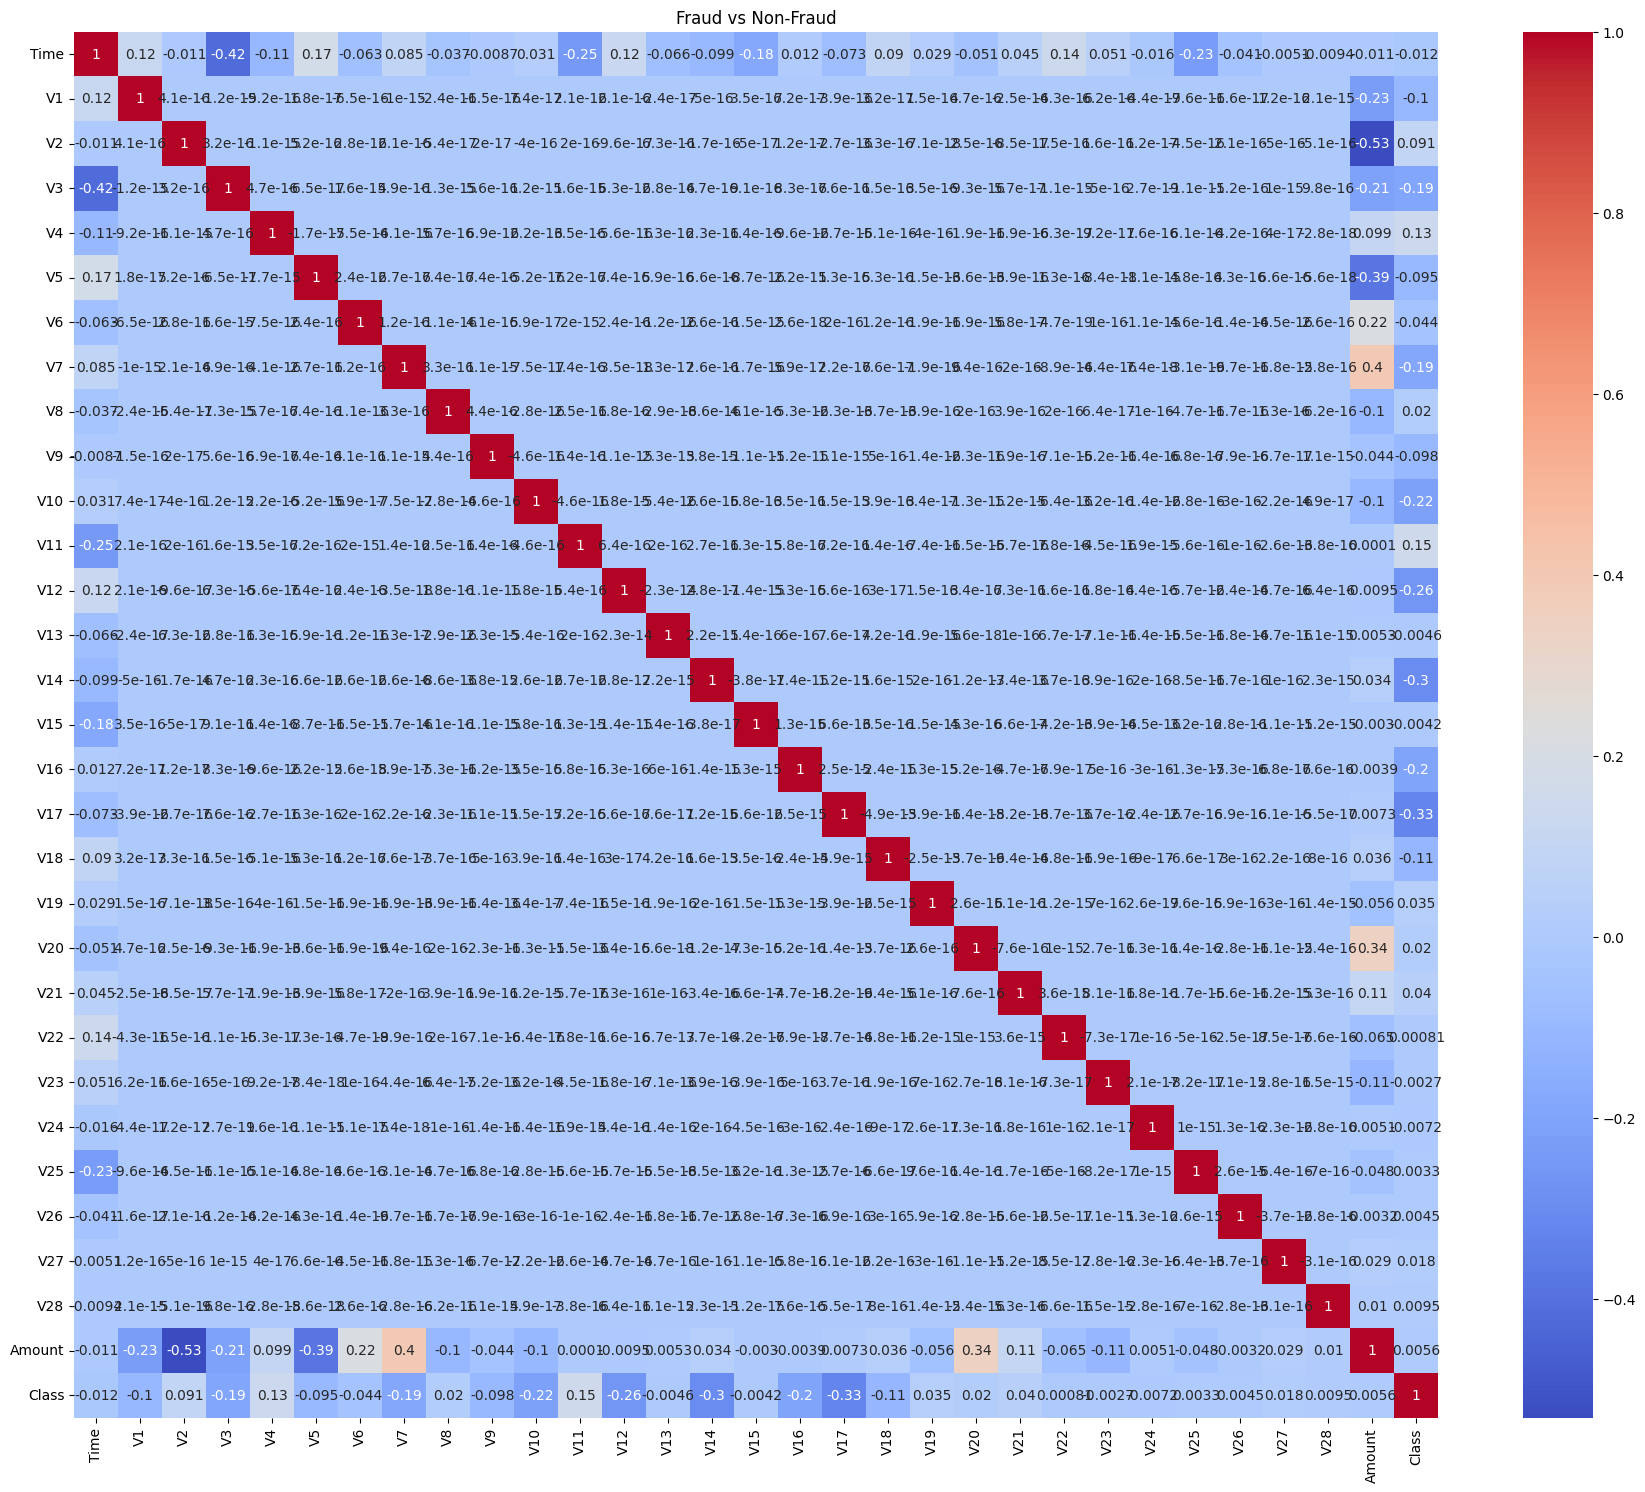

In [3]:
# Count of fraud vs non-fraud
print(df['Class'].value_counts())
# Correlation heatmap
correlation_matrix = df.corr()

plt.figure(figsize = (22,18))
sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm')
plt.title("Fraud vs Non-Fraud")
plt.show()

## Data Preprocessing

In [4]:
# Feature scaling for 'Amount' and 'Time'
df_scaled = df.copy()
scaler = StandardScaler()
df['scaled_time'] = scaler.fit_transform(df[['Time']])
df['scaled_amount'] = scaler.fit_transform(df[['Amount']])


# Drop original columns
df = df.drop(['Time', 'Amount'], axis=1)

# Rearranging columns

cols = df.columns.tolist()
print(cols)

print("-------------------Removing & adding to the front----------------------")

cols.remove('scaled_time')
cols.remove('scaled_amount')

new_cols = ['scaled_time', 'scaled_amount'] + cols
df = df[new_cols]

print(df.columns.tolist())

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'scaled_time', 'scaled_amount']
-------------------Removing & adding to the front----------------------
['scaled_time', 'scaled_amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class']


## Model Training

In [6]:
# Define features and target
x = df_scaled.drop('Class', axis = 1)
y = df_scaled['Class']

# Train-test split with stratification
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 2,stratify = y )

# Logistic Regression
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(x_train,y_train)

# Predictions
y_pred = model.predict(x_test)

C:\Users\Likhith Avinash\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluation

In [9]:
# Confusion matrix and classification report
cm = confusion_matrix(y_test,y_pred,labels = [0,1])
cr = classification_report(y_test,y_pred,target_names = ['Normal','Fraud'],digits = 4)

print("Confusion Matrix:")
print(cm)

print('-'*55)

print("\nClassification Report:")
print("                 Model")
print(cr)

print('-'*55)

print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

Confusion Matrix:
[[56854    10]
 [   33    65]]
-------------------------------------------------------

Classification Report:
                 Model
              precision    recall  f1-score   support

      Normal     0.9994    0.9998    0.9996     56864
       Fraud     0.8667    0.6633    0.7514        98

    accuracy                         0.9992     56962
   macro avg     0.9330    0.8315    0.8755     56962
weighted avg     0.9992    0.9992    0.9992     56962

-------------------------------------------------------
ROC AUC Score: 0.8315447239672459


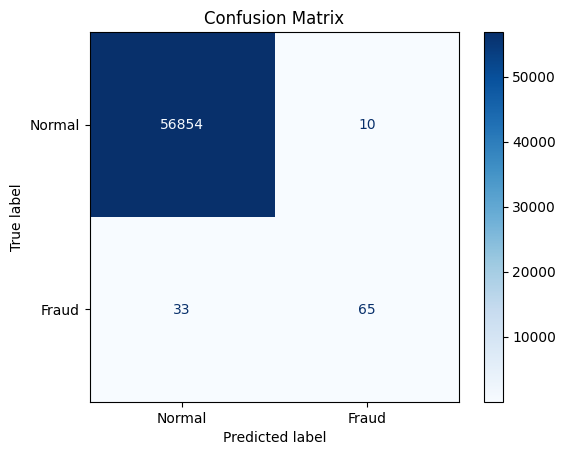

In [11]:
## Displaying Confusion Matrix
disp = ConfusionMatrixDisplay(cm, display_labels=['Normal', 'Fraud'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## Conclusion
- Used logistic regression for binary classification.
- Addressed feature scaling and class imbalance.
- Future work: try ensemble methods (e.g. Random Forest, XGBoost) or SMOTE for better fraud detection.